# Mathematical Building Block

## Data representation

In [98]:
import numpy as np
from tensorflow.keras import models,layers

### Scalars (0D Tensors)
`ndim = 0`

The number of axes of a tensor is also called its rank.

In [99]:
x = np.array(12)
x

array(12)

### Vector (1D Tensors)
`ndim = 1`

In [100]:
x = np.array([12,2,1,2])
x.ndim

1

In [101]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [102]:
train_images.shape


(60000, 28, 28)

`60 000` matrices of `28x28`

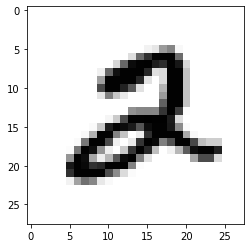

In [103]:
some_digit = train_images[5]
import matplotlib.pyplot as plt
plt.imshow(some_digit,cmap=plt.cm.binary)
plt.show()

#### Manipulating tensors in Numpy

Let's pick up the lower `14 x 14` pixels

In [104]:
my_slice = train_images[:,14:,14:]


Let's center up the lower `14 x 14` pixels
with only 10 -> 100 indices

In [105]:
my_second_slice = train_images[10:100,7:-7,7:-7]

Since they don't process an entire dataset at once , rather they
break into small batches


In [106]:
n = 2
batch = train_images[128 * n:128 * (n + 1)]


##### Time Series Data or Sequence data
Whenever time matters in your data , it makes sense to store it in
`3D` tensor with explicit time axis.

the time axis is always the second axis by convention `1`

Bear in mind the first axis is the samples amount

##### Layers in Keras includes tensor in tensor out function

Much as any computer program can be ultimately reduced to a small set of binary
operations on binary inputs ( AND , OR , NOR , and so on), all transformations learned
by deep neural networks can be reduced to a handful of tensor operations applied to
tensors of numeric data.

In [107]:
from tensorflow.keras.layers import Dense

o = Dense(512,activation='relu')
# this layer can be interpreted as a function

This layer can be interpreted as a function, which takes as input a `2D` tensor and
returns another `2D` tensor—a new representation for the input tensor.

The function in this case is the output  $ relu(dot(W, input) + b)$
we have three tensors operations
* $dot$
* ( + )
* $relu(x)$ is $max(x,0)$

#### Element wise operation
$relu$ operation and addition are element wise
that are implemented to each entry in the tensor being considered.

####  Broadcasting
this is when different tensors are added like we added 2D tensor
with a vector if we have different shapes
* Axes called ( broadcast axis ) are added to the smaller tensor
will be broadcast to match the shape the `ndim` of the larger tensor
* The smaller tensor is repeated alongside these new axes to match the full
shape of the larger tensor.

Example:
let `X = (32, 10)` and `Y = (10,)`

* we add an empty first to y shape becomes `(1, 10)`
* repeat `y` `32` times alongside the new axis, so we end up with tensor
shape `(32, 10)` so that

`Y[i, :] == y for i in range(0, 32)`


#### Important Note
In terms of implementation, no new 2D tensor is created, because that would be
terribly inefficient. The repetition operation is entirely virtual it happens at the
algorithmic level rather than at the memory level

In [108]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

####  Tensor dot
`(a, b, c, d) . (d,) -> (a, b, c)`

`(a, b, c, d) . (d, e) -> (a, b, c, e)`


#### Back to the Example

In [109]:
(train_images1, train_labels1), (test_images1, test_labels1) = mnist.load_data()
train_images1 = train_images1.reshape((60000, 28 * 28))
train_images1 = train_images1.astype('float32') / 255
test_images1 = test_images1.reshape((10000, 28 * 28))
test_images1 = test_images1.astype('float32') / 255 # TODO why?

In [110]:
# adding layers which are tensor operations
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [111]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [112]:
network

In [121]:
network.fit(train_images1, train_labels1, epochs=3, batch_size=128)


ValueError: in user code:

    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 train_step
        loss = self.compiled_loss(
    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible
